# Demo - Teams recommendations for projects

In [1]:
import pandas as pd

## Teams sample generation

In [2]:
from utils import TeamsFactory

In [3]:
args = {
    "teams_amount": 100,
    "max_programming_languages": 4 ,
    "max_frameworks": 3 ,
    "max_platforms": 1,
    "max_databases": 3,
    "max_idioms": 2,
    "max_project_preferences": 2
}

In [4]:
factory = TeamsFactory(**args)
teams = factory.create_teams()

In [80]:
teams_df = pd.DataFrame(teams)

In [81]:
teams_df.tail()

,name,project_preferences,owner,idioms,technologies
95,team_95,"[crypto, data_engineering]",9XUXZILjj1NUukUcWQy8FpNQl9F2,[English],"{'programming_language': ['Ruby'], 'frameworks..."
96,team_96,"[base, data_engineering]",9XUXZILjj1NUukUcWQy8FpNQl9F2,[Spanish],"{'programming_language': ['JavaScript'], 'fram..."
97,team_97,"[mobile, backend]",9XUXZILjj1NUukUcWQy8FpNQl9F2,[Spanish],"{'programming_language': ['Ruby'], 'frameworks..."
98,team_98,[mobile],9XUXZILjj1NUukUcWQy8FpNQl9F2,[Spanish],"{'programming_language': ['JavaScript'], 'fram..."
99,team_99,[base],9XUXZILjj1NUukUcWQy8FpNQl9F2,"[Spanish, English]","{'programming_language': ['JavaScript'], 'fram..."


In [82]:
teams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 100 non-null    object
 1   project_preferences  100 non-null    object
 2   owner                100 non-null    object
 3   idioms               100 non-null    object
 4   technologies         100 non-null    object
dtypes: object(5)
memory usage: 4.0+ KB


In [83]:
teams_df.to_csv("teams_input.csv",index=False)

In [5]:
teams_df = pd.read_csv("teams_input.csv")

## Project example

In [6]:
project = {
    "pid": "057dc2ae-462c-43f7-9fb6-bcdd67c8ff1a",
    "name": "Python-Django Project",
    "idioms": [
      "English"
    ],
    "description": {
      "files_attached": {
        "files": [],
        "images": []
      },
      "functional_requirements": [
        ""
      ],
      "non_function_requirements": [],
      "summary": "DESIGN AND DEVELOP PLATFORM USING PYTHON AND DJANGO FOR AN API-PRODUCT COMPANY"
    },
    "technologies": {
      "programming_language": [
        "Python"      ],
      "frameworks": [
        "Django"
      ],
      "platforms": [],
      "databases": [
        "PostgreSQL"
      ]
    },
    "state": "PENDING",
    "created_date": "26-02-2023:21:20:10",
    "updated_date": "26-02-2023:21:20:10",
    "team_assigned": None,
    "activities_record": [],
    "tentative_budget": 1000,
    "budget_currency": "DOLAR",
    "tentative_duration": 1,
    "unit_duration": "MONTHS",
    "project_type": "backend",
    "creator": {
      "uid": "9XUXZILjj1NUukUcWQy8FpNQl9F2",
      "name": "Matias",
      "lastname": "Fonseca",
      "email": "mfonseca@fi.uba.ar",
      "location": "Buenos Aires, Argentina",
      "education": [],
      "work_experience": [],
      "profile_image": "default",
      "cover_image": "default",
      "created_date": "19-02-2023:23:40:29",
      "updated_date": "19-02-2023:23:40:29",
      "skills": None,
      "idioms": None
    }
}

ideal_team = factory.get_ideal_team(project)
ideal_team_df = pd.DataFrame([ideal_team])
ideal_team_df.head()

,name,project_preferences,owner,idioms,technologies
0,,[backend],,[English],"{'programming_language': ['Python'], 'framewor..."


## Data Transformation before matching

In [7]:
from pipeline_transformations import * 

In [8]:
from sklearn import set_config
set_config(display="diagram")

In [9]:
pipeline = Pipeline(
    steps=[('descompose_technologies', DescomposeTechnologies()),
           ('idioms_ohe', OHEIdioms()),
           ('programming_language_ohe', OHEProgrammingLanguage()),
           ('frameworks_ohe', OHEFrameworks()),
           ('platform_ohe', OHEPlatforms()),
           ('databases_ohe', OHEDatabases()),
           ('project_preferences_ohe', OHEProjectPreferences()),
           ('remove_columns', RemoveColumns()),
          ])

In [10]:
pipeline

Pipeline(steps=[('descompose_technologies', DescomposeTechnologies()),
                ('idioms_ohe', OHEIdioms()),
                ('programming_language_ohe', OHEProgrammingLanguage()),
                ('frameworks_ohe', OHEFrameworks()),
                ('platform_ohe', OHEPlatforms()),
                ('databases_ohe', OHEDatabases()),
                ('project_preferences_ohe', OHEProjectPreferences()),
                ('remove_columns', RemoveColumns())])

In [11]:
ideal_team_input = pipeline.transform(ideal_team_df)

/Users/matifonseca/Workspace/FindMyTeam/Models/pipeline_transformations.py:63: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"programming_language_{language}"] = X["programming_language"].map(lambda languages_i: 1 if value_in(language, languages_i) else 0)
/Users/matifonseca/Workspace/FindMyTeam/Models/pipeline_transformations.py:63: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"programming_language_{language}"] = X["programming_language"].map(lambda languages_i: 1 if value_in(language, languages_i) else 0)


In [12]:
ideal_team_input.head()

,idiom_english,idiom_chinese,idiom_spanish,idiom_french,idiom_german,idiom_portuguese,programming_language_python,programming_language_java,programming_language_javascript,programming_language_c++,...,database_memcached,database_microsoft azure sql database,project_preferences_base,project_preferences_backend,project_preferences_mobile,project_preferences_web,project_preferences_crypto,project_preferences_data_analitycs,project_preferences_data_science,project_preferences_data_engineering
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [13]:
teams_input = pipeline.transform(teams_df)

/Users/matifonseca/Workspace/FindMyTeam/Models/pipeline_transformations.py:63: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"programming_language_{language}"] = X["programming_language"].map(lambda languages_i: 1 if value_in(language, languages_i) else 0)
/Users/matifonseca/Workspace/FindMyTeam/Models/pipeline_transformations.py:63: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"programming_language_{language}"] = X["programming_language"].map(lambda languages_i: 1 if value_in(language, languages_i) else 0)


In [14]:
teams_input.tail()

,idiom_english,idiom_chinese,idiom_spanish,idiom_french,idiom_german,idiom_portuguese,programming_language_python,programming_language_java,programming_language_javascript,programming_language_c++,...,database_memcached,database_microsoft azure sql database,project_preferences_base,project_preferences_backend,project_preferences_mobile,project_preferences_web,project_preferences_crypto,project_preferences_data_analitycs,project_preferences_data_science,project_preferences_data_engineering
95,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
96,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
97,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
98,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
99,1,0,1,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,0


## Models

In [15]:
import pickle

### Exact model

In [16]:
from sklearn.neighbors import NearestNeighbors

In [17]:
nbrs = NearestNeighbors(n_neighbors=5,  metric="cosine")

In [18]:
%%time
nbrs.fit(teams_input)

CPU times: user 2.73 ms, sys: 172 µs, total: 2.9 ms
Wall time: 2.77 ms


NearestNeighbors(metric='cosine')

In [19]:
pickle.dump(nbrs, open("nbrs", 'wb'))

### Approximate model (Spotify model)

In [20]:
from annoy import AnnoyIndex

In [21]:
%%time
f = len(teams_input.columns)  # Length of item vector that will be indexed

t = AnnoyIndex(f, 'angular')
for index, row in teams_input.iterrows():
    t.add_item(index, row)
t.build(10) # 10 trees


CPU times: user 33.3 ms, sys: 3.7 ms, total: 37 ms
Wall time: 35.2 ms


True

In [22]:
t.save('test.ann')

True

### Distance metric

**Angular distance**: Mostly Cosine distance metric is used to find similarities between different documents. In cosine metric we measure the degree of angle between two vectors.

<img src="./cos.png" alt="Alternative text"  width="200" height="100"/>


## Matching 

In [23]:
nbrs = pickle.load(open("nbrs", 'rb'))

In [24]:
f = len(teams_input.columns)
annoy = AnnoyIndex(f, 'angular')
annoy.load('test.ann') 

True

### Search similar teams of ideal team

In [25]:
k = 3 #neighbors amount
v = ideal_team_input.iloc[0] # vector representation of ideal team

In [26]:
%%time
distances_nbrs, neighbors_nbrs = nbrs.kneighbors([v], k, return_distance=True)

CPU times: user 5.34 ms, sys: 2.26 ms, total: 7.6 ms
Wall time: 7.89 ms


In [27]:
results_nbrs = pd.DataFrame.from_dict({"neighbors": neighbors_nbrs[0], "distances": distances_nbrs[0]}) 
results_nbrs.head()

,neighbors,distances
0,27,0.292893
1,23,0.403715
2,4,0.460640


In [28]:
%%time
neighbors_annoy, distances_annoy  = annoy.get_nns_by_vector(v, k, search_k=-1, include_distances=True)

CPU times: user 1.75 ms, sys: 763 µs, total: 2.51 ms
Wall time: 2.43 ms


In [29]:
results_annoy = pd.DataFrame.from_dict({"neighbors": neighbors_annoy, "distances": distances_annoy}) 
results_annoy.head()

,neighbors,distances
0,27,0.765367
1,23,0.898571
2,4,0.959833


### Results

In [30]:
from utils import print_team, print_teams_recommendation

#### Project

In [31]:
print_team(ideal_team_df)

type index: <class 'int'>
project_type: ['backend'] 
idioms:  ['English']
programming_language:  ['Python']
frameworks:  ['Django']
databases:  ['PostgreSQL']
platforms:  []


#### Exact model recommendations

In [32]:
print_teams_recommendation(teams_df, results_nbrs["neighbors"])

Rank 1º - Team 27
type index: <class 'int'>
project_type: ['backend', 'data_engineering'] 
idioms:  ['English']
programming_language:  ['Python', 'Java']
frameworks:  ['Spring', 'Django']
databases:  ['Solr', 'PostgreSQL']
platforms:  ['Strikingly']


Rank 2º - Team 23
type index: <class 'int'>
project_type: ['data_science', 'mobile'] 
idioms:  ['English']
programming_language:  ['Python']
frameworks:  ['Django']
databases:  ['HBase', 'MariaDB', 'PostgreSQL']
platforms:  ['Jimdo Creator']


Rank 3º - Team 4
type index: <class 'int'>
project_type: ['data_science', 'backend'] 
idioms:  ['Spanish', 'English']
programming_language:  ['Python', 'Java']
frameworks:  ['Spring', 'Django']
databases:  ['Elasticsearch', 'Redis']
platforms:  ['Zyro']




#### Approximate model recommendations


In [33]:
print_teams_recommendation(teams_df, results_annoy["neighbors"])

Rank 1º - Team 27
type index: <class 'int'>
project_type: ['backend', 'data_engineering'] 
idioms:  ['English']
programming_language:  ['Python', 'Java']
frameworks:  ['Spring', 'Django']
databases:  ['Solr', 'PostgreSQL']
platforms:  ['Strikingly']


Rank 2º - Team 23
type index: <class 'int'>
project_type: ['data_science', 'mobile'] 
idioms:  ['English']
programming_language:  ['Python']
frameworks:  ['Django']
databases:  ['HBase', 'MariaDB', 'PostgreSQL']
platforms:  ['Jimdo Creator']


Rank 3º - Team 4
type index: <class 'int'>
project_type: ['data_science', 'backend'] 
idioms:  ['Spanish', 'English']
programming_language:  ['Python', 'Java']
frameworks:  ['Spring', 'Django']
databases:  ['Elasticsearch', 'Redis']
platforms:  ['Zyro']




## Benchmarks 

### Training

In [133]:
args = {
    "teams_amout": 100,
    "max_programming_languages": 4 ,
    "max_frameworks": 3 ,
    "max_platforms": 1,
    "max_databases": 3,
    "max_idioms": 2,
    "max_project_preferences": 2
}   


In [144]:
args['teams_amout'] = 1000
factory = TeamsFactory(**args)
sample_1000 = factory.create_teams()
teams_df_1000 = pd.DataFrame(sample_1000)

args['teams_amout'] = 10000
factory = TeamsFactory(**args)
sample_10000 = factory.create_teams()
teams_df_10000 = pd.DataFrame(sample_10000)

args['teams_amout'] = 100000
factory = TeamsFactory(**args)
sample_100000 = factory.create_teams()
teams_df_100000 = pd.DataFrame(sample_100000)

args['teams_amout'] = 1000000
factory = TeamsFactory(**args)
sample_1000000 = factory.create_teams()
teams_df_1000000 = pd.DataFrame(sample_1000000)

In [146]:
teams_df_1000_input = pipeline.transform(teams_df_1000)
teams_df_10000_input = pipeline.transform(teams_df_10000)
teams_df_100000_input = pipeline.transform(teams_df_100000)
teams_df_1000000_input = pipeline.transform(teams_df_1000000)

type: <class 'dict'>
type: <class 'dict'>


/Users/matifonseca/Workspace/FindMyTeam/Models/pipeline_transformations.py:63: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"programming_language_{language}"] = X["programming_language"].map(lambda languages_i: 1 if value_in(language, languages_i) else 0)
/Users/matifonseca/Workspace/FindMyTeam/Models/pipeline_transformations.py:63: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"programming_language_{language}"] = X["programming_language"].map(lambda languages_i: 1 if value_in(language, languages_i) else 0)
/Users/matifon

type: <class 'dict'>


/Users/matifonseca/Workspace/FindMyTeam/Models/pipeline_transformations.py:63: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"programming_language_{language}"] = X["programming_language"].map(lambda languages_i: 1 if value_in(language, languages_i) else 0)
/Users/matifonseca/Workspace/FindMyTeam/Models/pipeline_transformations.py:63: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"programming_language_{language}"] = X["programming_language"].map(lambda languages_i: 1 if value_in(language, languages_i) else 0)


type: <class 'dict'>


/Users/matifonseca/Workspace/FindMyTeam/Models/pipeline_transformations.py:63: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"programming_language_{language}"] = X["programming_language"].map(lambda languages_i: 1 if value_in(language, languages_i) else 0)
/Users/matifonseca/Workspace/FindMyTeam/Models/pipeline_transformations.py:63: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"programming_language_{language}"] = X["programming_language"].map(lambda languages_i: 1 if value_in(language, languages_i) else 0)


### Exact model 

In [147]:
%time
nbrs_1000 = NearestNeighbors(n_neighbors=5,  metric="cosine")
nbrs_1000.fit(teams_df_1000_input)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 6.91 µs


NearestNeighbors(metric='cosine')

In [148]:
%time
nbrs_10000 = NearestNeighbors(n_neighbors=5,  metric="cosine")
nbrs_10000.fit(teams_df_10000_input)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.87 µs


NearestNeighbors(metric='cosine')

In [149]:
%time
nbrs_100000 = NearestNeighbors(n_neighbors=5,  metric="cosine")
nbrs_100000.fit(teams_df_100000_input)

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 10 µs


NearestNeighbors(metric='cosine')

In [151]:
%time
nbrs_1000000 = NearestNeighbors(n_neighbors=5,  metric="cosine")
nbrs_1000000.fit(teams_df_1000000_input)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs


NearestNeighbors(metric='cosine')

In [157]:
%%time
nbrs_1000.kneighbors([teams_df_1000_input.iloc[0]])

CPU times: user 7.04 ms, sys: 5.11 ms, total: 12.2 ms
Wall time: 6.69 ms


(array([[3.33066907e-16, 2.28483250e-01, 2.28483250e-01, 2.85714286e-01,
         3.31846895e-01]]),
 array([[  0, 596, 510, 143,  57]]))

In [158]:
%%time
nbrs_10000.kneighbors([teams_df_10000_input.iloc[0]])

CPU times: user 30.5 ms, sys: 24 ms, total: 54.5 ms
Wall time: 38.3 ms


(array([[3.33066907e-16, 1.54845745e-01, 1.98216274e-01, 2.28483250e-01,
         2.28483250e-01]]),
 array([[   0, 1190, 5017, 1667, 3677]]))

In [159]:
%%time
nbrs_100000.kneighbors([teams_df_100000_input.iloc[0]])

CPU times: user 207 ms, sys: 120 ms, total: 328 ms
Wall time: 250 ms


(array([[0.        , 0.18350342, 0.18350342, 0.18350342, 0.18350342]]),
 array([[    0, 64473,  1595, 69272, 16644]]))

In [160]:
%%time
nbrs_1000000.kneighbors([teams_df_1000000_input.iloc[0]])

CPU times: user 1.97 s, sys: 842 ms, total: 2.81 s
Wall time: 2.23 s


(array([[3.33066907e-16, 1.42857143e-01, 1.42857143e-01, 1.42857143e-01,
         1.42857143e-01]]),
 array([[     0, 459562, 398192, 766023, 474079]]))

In [161]:
performance_nbrs = [6.69, 38.3, 250, 2230]

In [175]:
performance_nbrs_training = [0.0691, 0.0787, 0.010, 0.0715]

## aproximate model

In [162]:
%%time
f = len(teams_df_1000_input.columns)  # Length of item vector that will be indexed

t_1000 = AnnoyIndex(f, 'angular')
for index, row in teams_df_1000_input.iterrows():
    t_1000.add_item(index, row)
t_1000.build(10) # 10 trees


CPU times: user 231 ms, sys: 8.62 ms, total: 239 ms
Wall time: 235 ms


True

In [163]:
%%time

t_10000 = AnnoyIndex(f, 'angular')
for index, row in teams_df_10000_input.iterrows():
    t_10000.add_item(index, row)
t_10000.build(10) # 10 trees


CPU times: user 2.16 s, sys: 46.9 ms, total: 2.2 s
Wall time: 2.12 s


True

In [164]:
%%time


t_100000 = AnnoyIndex(f, 'angular')
for index, row in teams_df_100000_input.iterrows():
    t_100000.add_item(index, row)
t_100000.build(10) # 10 trees


CPU times: user 22.7 s, sys: 139 ms, total: 22.9 s
Wall time: 21.2 s


True

In [165]:
%%time

t_1000000 = AnnoyIndex(f, 'angular')
for index, row in teams_df_1000000_input.iterrows():
    t_1000000.add_item(index, row)
t_1000000.build(10) # 10 trees


CPU times: user 4min 11s, sys: 2.38 s, total: 4min 13s
Wall time: 3min 47s


True

In [167]:
%%time
v = teams_df_1000_input.iloc[0]
k = 5
t_1000.get_nns_by_vector(v, k, search_k=-1, include_distances=True)

CPU times: user 1.1 ms, sys: 187 µs, total: 1.29 ms
Wall time: 1.24 ms


([0, 510, 122, 332, 821],
 [0.0003452669770922512,
  0.675993025302887,
  0.8749704360961914,
  0.8749704360961914,
  0.8749704360961914])

In [168]:
%%time
v = teams_df_10000_input.iloc[0]
k = 5
t_10000.get_nns_by_vector(v, k, search_k=-1, include_distances=True)

CPU times: user 1.01 ms, sys: 133 µs, total: 1.14 ms
Wall time: 1.11 ms


([0, 1190, 3901, 1468, 8043],
 [0.0003452669770922512,
  0.5564993619918823,
  0.675993025302887,
  0.7559289932250977,
  0.7559289932250977])

In [170]:
%%time
v = teams_df_100000_input.iloc[0]
k = 5
t_100000.get_nns_by_vector(v, k, search_k=-1, include_distances=True)

CPU times: user 1.09 ms, sys: 132 µs, total: 1.22 ms
Wall time: 1.07 ms


([0, 1595, 69272, 8638, 34118],
 [0.0003452669770922512,
  0.6058109402656555,
  0.6058109402656555,
  0.6582561731338501,
  0.6785273551940918])

In [171]:
%%time
v = teams_df_1000000_input.iloc[0]
k = 5
t_100000.get_nns_by_vector(v, k, search_k=-1, include_distances=True)

CPU times: user 1.23 ms, sys: 158 µs, total: 1.39 ms
Wall time: 1.32 ms


([66246, 30307, 67327, 74128, 3639],
 [0.5564993619918823,
  0.6296288967132568,
  0.675993025302887,
  0.675993025302887,
  0.7559289932250977])

In [173]:
performance_annoy = [1.24, 1.01, 1.07, 1.32] 

In [174]:
performance_annoy_training = [235, 2120, 21200, 227000]

In [176]:
amount_samples = [1000, 10000, 100000, 1000000]

In [177]:
benchmark_df = pd.DataFrame.from_dict({"sample_amount": amount_samples, 
                                       "performance_annoy_training": performance_annoy_training,
                                      "performance_annoy": performance_annoy,
                                      "performance_nbrs_training": performance_nbrs_training,
                                      "performance_nbrs": performance_nbrs})

In [178]:
benchmark_df.head()

,sample_amount,performance_annoy_training,performance_annoy,performance_nbrs_training,performance_nbrs
0,1000,235,1.24,0.0691,6.69
1,10000,2120,1.01,0.0787,38.30
2,100000,21200,1.07,0.0100,250.00
3,1000000,227000,1.32,0.0715,2230.00


#### Performance: training

In [180]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'performance training'}, xlabel='sample amount', ylabel='time (ms)'>

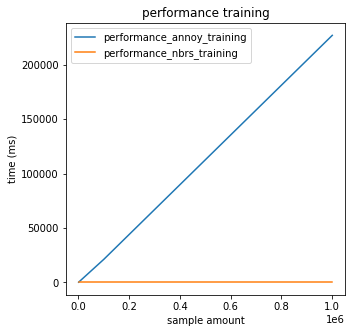

In [192]:
axes = plt.gca()
benchmark_df.plot(kind="line", x="sample_amount", y="performance_annoy_training", ax=axes, figsize=(5, 5), xlabel= "sample amount", ylabel= "time (ms)", title="performance training")
benchmark_df.plot(kind="line", x="sample_amount", y="performance_nbrs_training", ax=axes, figsize=(5, 5), xlabel= "sample amount", ylabel= "time (ms)", title="performance training")

#### Performance: searching neighbors

<AxesSubplot:title={'center':'performance search'}, xlabel='sample amount', ylabel='time (ms)'>

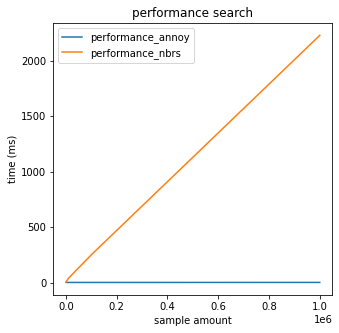

In [193]:
axes = plt.gca()
benchmark_df.plot(kind="line", x="sample_amount", y="performance_annoy", ax=axes, figsize=(5, 5), xlabel= "sample amount", ylabel= "time (ms)", title="performance search")
benchmark_df.plot(kind="line", x="sample_amount", y="performance_nbrs", ax=axes,figsize=(5, 5), xlabel= "sample amount", ylabel= "time (ms)", title="performance search")

In [1]:
import pandas as pd

In [2]:
data = pd.DataFrame({"uid": [4, 5, 7]})
dic = {}
for index, row in data.iterrows():
    dic[index] = row["uid"]

In [4]:
data["uid"]


0    4
1    5
2    7
Name: uid, dtype: int64

In [7]:
data["uid"][1]

5

In [9]:
data.loc[1]["uid"]

5